# Problem 1
- Mateus Silva Aragao , msa8779

 We will review this in Lab 2.
Let $y(x) = f(x) + ε$ be the measured relationship and $\hat{y} = g(x)$ be the model predicted value of $y$. Then MSE over test instance $x_i, i = 1,...,t,$ is given by:

$MSE = \frac{1}{t} \sum_{i=1}^{t} (f(x_i) + ε − g(x_i))^2$



Recall that the expected mean squared error of a regression problem can be written as
$E[MSE] = Bias2 + V ariance + Noise$


### 1-
Consider the case when $f (x) = x + sin(1.5x)$ and $y(x) = f (x) + N (0, 0.3)$, where$ N (0, 0.3)$ is normal distribution with mean 0 and standard deviation 0.3. Create a dataset of size 20 points by randomly generating samples from y. Display the dataset and $f(x)$. Use scatter plot for y and smooth line plot for $f(x)$.

In [18]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

def f_x(x):
    return x+np.sin(1.5*x)

def y_x(x):
    return f_x(x)+ np.random.normal(0, 0.3, 1)[0]

np.random.seed(42069)

x_sample = np.random.uniform(0,5,20)

data_f = [ f_x(i) for i in x_sample]

data_y = [i+ np.random.normal(0, 0.3, 1)[0] for i in data_f]

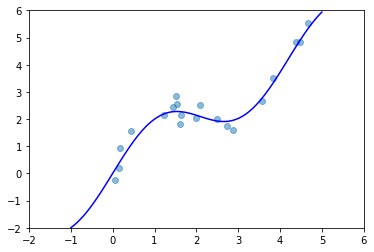

In [7]:
x = np.linspace(-1,5,100)

y = [f_x(i) for i in x]
plt.plot(x,y, 'b')
plt.scatter(x_sample, data_y, alpha=0.5)
plt.xlim([-2, 6])
plt.ylim([-2, 6])
plt.show()

### 2-
Use weighted sum of polynomials as an estimator function for f(x), in particular, let the form of estimator function be:
*$g_n(x)=β0 +β1x+β2x_2 +.....+β_nx_n$
Consider four candidate estimators, $g_1,g_3,g_5, and g_{10}$. Estimate the coefficients of each of the four estimators using the sampled dataset and plot $y(x),f(x),g1(x),g3(x),g10(x)$. Which estimator is underfitting ? Which one is overfitting ?

Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

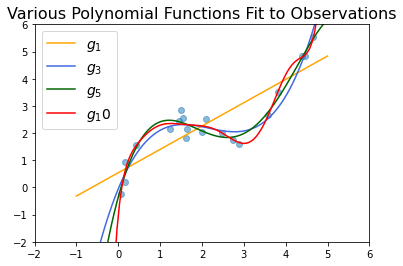

In [14]:
colors = ['orange', 'royalblue', 'darkgreen','red']

plt.scatter(x_sample, data_y, alpha=0.5)

polynomial_degrees = [1, 3, 5,10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    theta[degree] = np.polyfit(x_sample, data_y, degree)
    fit[degree] = np.polyval(theta[degree], x)
    plt.plot(x, fit[degree], colors[ii], label=f"$g_{str(degree)}$")
plt.legend(fontsize=14)
plt.xlim([-2, 6])
plt.ylim([-2, 6])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=16)

### 3. 
Generate 100 datasets (each of size 50) by randomly sampling from y.

(a) Next fit the estimators of varying complexity, i.e., g1 , g2 , ....g15 using the training set for each dataset. Then calculate and plot the squared bias, variance, and error on testing set for each of the estimators showing the tradeoff between bias and variance with model complexity. 

(b) Identify the best model, i.e., the model with the smallest Mean Squared Error. What is the value of bias and variance for this model?
## Answer: 
The best polynomial seems to be the one of degree 3

In [73]:
# function for bias squared
def bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)

    return np.mean((average_model_prediction - f_x(x_test)) ** 2)

# function for variance
def variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0) 

    return np.mean((pred_test - average_model_prediction) ** 2)

# function for error
def error(pred, actual):
    return (pred - actual) ** 2

Text(0.5, 1.0, 'Bias and Variance')

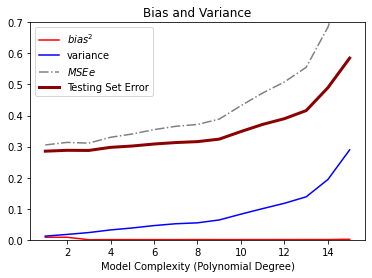

In [56]:
from collections import defaultdict

np.random.seed(101)
sample_size = 50
datasets = 100
degrees = range(1, 15 + 1)
n_train = int(np.ceil(sample_size * .8))

# creating sample space
x = np.linspace(-1, 1, sample_size)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# declaring container

pred_trains = defaultdict(list)
pred_tests = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

# genarating 100 random dataset
for dataset in range(datasets):

    # drawing y coordinates
    y_train = f_x(x_train) + .5 * np.random.randn(*x_train.shape)
    y_test = f_x(x_test) + .5 * np.random.randn(*x_test.shape)
    
    # fit model of increasing degrees
    for degree in degrees:
        # fit model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_trains[degree].append(pred_train)

        pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_tests[degree].append(pred_test)

        # Mean Squared Error 
        train_errors[degree].append(np.mean(error(pred_train, y_train)))
        test_errors[degree].append(np.mean(error(pred_test, y_test)))


degree_train_error = []
degree_test_error = []
bias_squared_list = []
variance_list = []
for degree in degrees:
    degree_train_error.append(np.mean(train_errors[degree]))
    degree_test_error.append(np.mean(test_errors[degree]))
    bias_squared_list.append(bias_squared(pred_tests[degree]))
    variance_list.append(variance(pred_tests[degree]))

best_model_degree = degrees[np.argmin(degree_train_error)]

plt.plot(degrees, bias_squared_list, color='red', label='$bias^2$')
plt.plot(degrees, variance_list, color='blue', label='variance')
plt.plot(degrees, np.array(bias_squared_list) + np.array(variance_list) + np.array(degree_test_error),  linestyle='-.', color='gray', label='$MSEe$')
plt.plot(degrees, degree_test_error, label='Testing Set Error', linewidth=3, color="darkred")

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .7]);
plt.legend()
plt.title('Bias and Variance')